# Data 620 Final Project
Amanda Arce and Nicholas Schettini

In this project, we decided to analyze tweets relating to star wars.  We had originally planned to look into traffic data, but with the new star wars movie coming out, we were interested in analyzing recent tweets relating to star wars.


Video link: https://screencast-o-matic.com/watch/cqlY3TvImn

First we started by importing necessary libraries

In [ ]:
import pandas as pd
import re
import textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import nltk
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings('ignore')

# Twitter connection 

In order to gather the necessary data, we had to establish a connection to twitter. We used a twitter Dev account to access the data, and used the tweepy library.

In [2]:
consumer_key='qf9p78TDvxHDOwoAZMoEZABQm'
consumer_secret='6dn3elaJhqj6NhnxcjUy6k9zOxbdj0ynAf5KQua6OKHLSysPmg'
access_token='970745798-3sOXctWjy5aapYUVEa9WO3Q8QAKTT95GXrhb5hzj'
access_token_secret='AzIWObLO0Dg9XTI1m0wjU06bzjqYzo7HZTMwBouey9QIw'

In [96]:
auth =  tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('star wars')

In [97]:
search_term = "#star+wars -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-12-18').items(1000)

In [98]:
#convert twitter data into a dataframe
json_data = [r._json for r in tweets]
df = pd.io.json.json_normalize(json_data)

In [99]:
df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang
0,Fri Dec 20 02:13:45 +0000 2019,1207846519673520128,1207846519673520128,Holy shit that AT&amp;T commercial playing ahe...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Dec 20 02:03:34 +0000 2019,1207843958098972672,1207843958098972672,Star Wars Vintage Action Toy Checklist Referen...,True,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Dec 20 00:51:32 +0000 2019,1207825827267612674,1207825827267612674,"Don’t get me wrong, I love the prequels.\n\nBu...",True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fri Dec 20 00:18:43 +0000 2019,1207817570604195841,1207817570604195841,@starwars with daddy #star wars #datenight @ A...,False,"<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,20106852.0,20106852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fri Dec 20 00:15:50 +0000 2019,1207816844826025984,1207816844826025984,Yoda and baby yoda #star wars https://t.co/LBH...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df1 = df[['text']]

We then had to clean up our data - some words that kept repeating that wouldn't help in our analysis were removed.

In [101]:
remove_words = ['star', 'wars', 'starwars','https', 'skywalker', 'war', 'force', 'lego', 'theriseofskywalker','kylo',
               'jedi','co', 'http']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df1['new'] = df1['text'].str.replace(pat, '')

We then used our two sentiment models to scan our data, and saved the results in a new column in our dataframe and graphed the results.

In [102]:
df1['SID_Sentiment'] = [sid.polarity_scores(tweet)["compound"] for tweet in df1['text']]
df1['TextBlob_Sentiment'] = [TextBlob(tweet).sentiment[0] for tweet in df1['text']]

In [103]:
df1.head()

,text,new,SID_Sentiment,TextBlob_Sentiment
0,Holy shit that AT&amp;T commercial playing ahe...,Holy shit that AT&amp;T commercial playing ahe...,-0.9329,-0.4
1,Star Wars Vintage Action Toy Checklist Referen...,Star Wars Vintage Action Toy Checklist Referen...,-0.5574,0.1
2,"Don’t get me wrong, I love the prequels.\n\nBu...","Don’t get me wrong, I love the prequels.\n\nBu...",0.2732,0.0
3,@starwars with daddy #star wars #datenight @ A...,@ with daddy # #datenight @ AMC Theaters - Ne...,-0.5574,0.0
4,Yoda and baby yoda #star wars https://t.co/LBH...,Yoda and baby yoda # ://t./LBH8zDb0ti,-0.5574,0.0


Text(0, 0.5, 'Density')

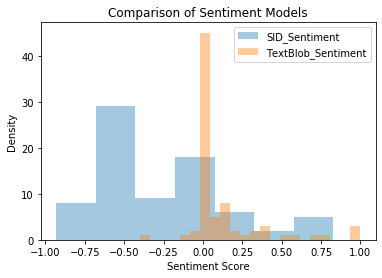

In [104]:
df = df1[df1.SID_Sentiment == 'SID_Sentiment']
sns.distplot(df1['SID_Sentiment'],  kde=False, label='SID_Sentiment')

df =df1[df1.TextBlob_Sentiment == 'TextBlob_Sentiment']
sns.distplot(df1['TextBlob_Sentiment'],  kde=False,label='TextBlob_Sentiment')

plt.legend(prop={'size': 10})
plt.title('Comparison of Sentiment Models')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')

We then wanted to see what specific words were repeated the most from our tweets - we decided to use a wordcloud.

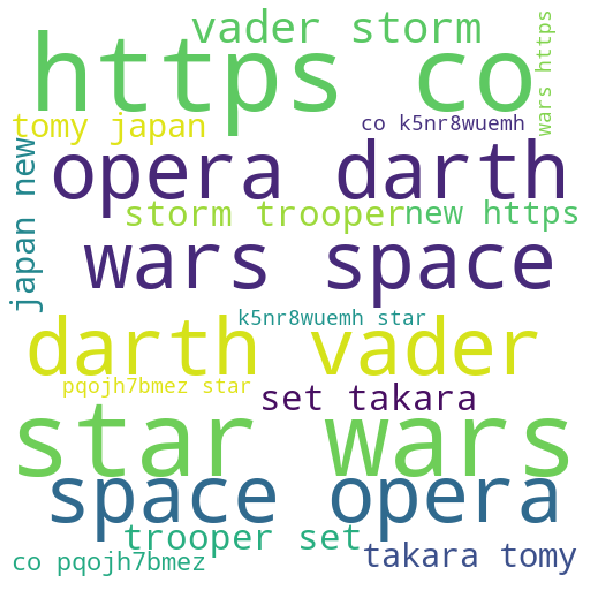

In [105]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
for w in df1.text: 
      
    w = str(w) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '
        
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Network Analysis

We then crerated an network analysis to determine releationships between the user 'starwars'.

In [93]:
import networkx as nx
graph_eng=nx.DiGraph()

# create Nodes
G = nx.Graph()

In [94]:
username = "Starwars"
followers = []
followers.extend(api.followers(screen_name=username))

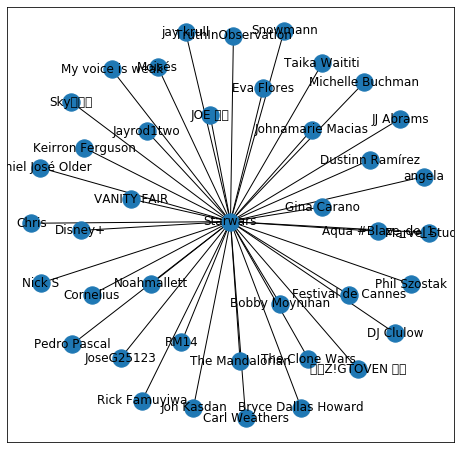

In [95]:
friends = []
friends.extend(api.friends(screen_name=username))

for user in followers:
    G.add_edge(user.name,username)
for user in friends:
    G.add_edge(username,user.name)

plt.figure(figsize=(8,8))
nx.draw_networkx(G)
plt.show()